In [ ]:
!pip install pystan~=2.14
!pip install prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
data1 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv", on_bad_lines='skip')
data2 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv", on_bad_lines='skip')
data3 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", on_bad_lines='skip')

In [ ]:
data = pd.concat([data1,data2,data3])

    ID: Unique identifier for the crime incident.
    Case Number: Records Division Number assigned to the incident.
    Date: Date when the incident occurred.
    Block: Block address of the incident.
    IUCR: The Illinois Uniform Crime Reporting code.
    Primary Type: The primary description of the crime according to the IUCR code.
    Description: Secondary description of the incident.
    Location Description: Description of the location where the incident occurred.
    Arrest: True or False if the convict was arrested.
    Domestic: True or False if the incident was domestic-related.
    Beat: A beat is the smallest police geographic area — each beat has a dedicated police beat car.
    District: District where the incident occurred.
    Ward: The City Council district where the incident occurred.
    Community Area: Chicago has 77 community areas.
    FBI Code: Crime classification according to FBI’s National Incident-Based Reporting System (NIBRS).
    X Coordinate: The x coordinate of the incident.
    Y Coordinate: The y coordinate of the incident.
    Year: Year the incident occurred.
    Updated On: Date and time the record was last updated.
    Latitude: The latitude of the incident.
    Longitude: The longitude of the incident.
    Location: The location of the incident

**1. Display Top 5 Rows of The Dataset**

In [ ]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


**2. Check Last 5 Rows of The Dataset**

In [ ]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


**3. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [ ]:
data.shape

(6017767, 23)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 6017767
Number of Columns 23


**4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

**5. Check Null Values In The Dataset**

In [ ]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

**6. Select Only The Necessary Columns**

In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
df = data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [ ]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


**7.Check Null Values In The Dataset**

In [ ]:
df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 241.0+ MB


In [ ]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


**8. Find The Top 10 Primary Crime Types**

In [ ]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [ ]:
df['Primary Type'].value_counts().head(10)

Primary Type
THEFT                  1244395
BATTERY                1079174
CRIMINAL DAMAGE         702696
NARCOTICS               674829
BURGLARY                369053
OTHER OFFENSE           368168
ASSAULT                 360242
MOTOR VEHICLE THEFT     271624
ROBBERY                 229463
DECEPTIVE PRACTICE      223947
Name: count, dtype: int64

**9 .How Many Criminals Are Arrested Having Primary Crime type is Theft?**

In [ ]:
df[df['Primary Type']=="THEFT"]['Arrest'].value_counts()

Arrest
False    1103085
True      141310
Name: count, dtype: int64

**10. Find The Top 10 Crime Location Descriptions**

In [ ]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [ ]:
df['Location Description'].value_counts().head(10)

Location Description
STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: count, dtype: int64

**11 .How Many of Are Arrested Having Location Type is STREET**

In [ ]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

Arrest
False    1093718
True      424006
Name: count, dtype: int64

In [ ]:
df.index = pd.DatetimeIndex(df.Date)

In [ ]:
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False


Text(0, 0.5, 'Number of Crimes')

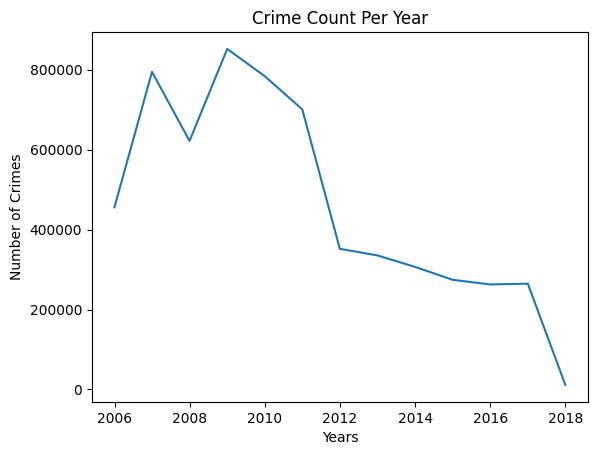

In [ ]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

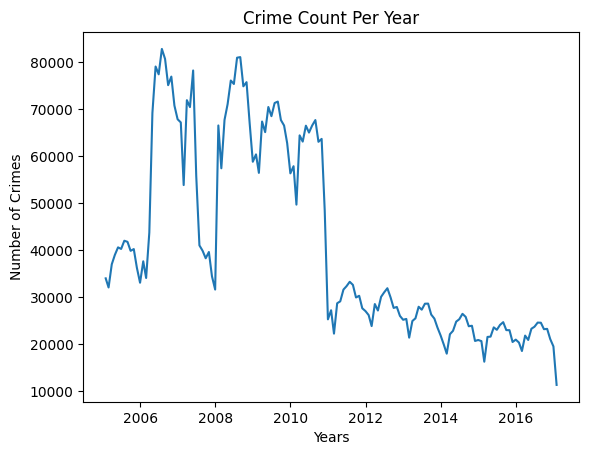

In [ ]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

**Preparing The data**

In [ ]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [ ]:
df_prophet.columns =['Date','Crime Count']

In [ ]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


**Rename The Columns**

In [ ]:
# ds and y

In [ ]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [ ]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


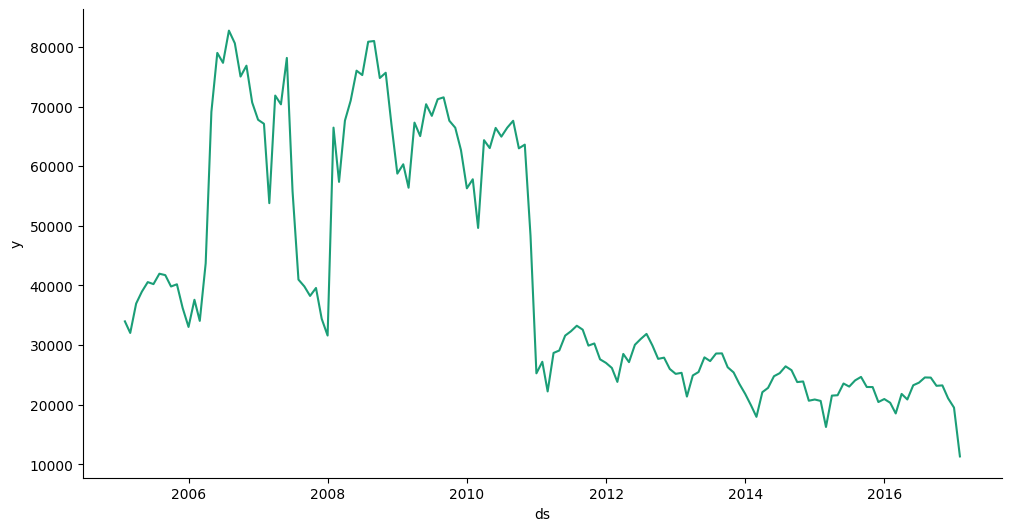

In [ ]:
# @title ds vs y

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_prophet.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

**Train The Model**

In [ ]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3tnw0sz/wwibbi52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3tnw0sz/yl3tnca6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87656', 'data', 'file=/tmp/tmpq3tnw0sz/wwibbi52.json', 'init=/tmp/tmpq3tnw0sz/yl3tnca6.json', 'output', 'file=/tmp/tmpq3tnw0sz/prophet_modelts79k11x/prophet_model-20240613225252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:52:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Make The Predictions**

In [ ]:
pred=m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60511.268500,39909.429936,72740.226857,60511.268500,60511.268500,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,0.0,0.0,0.0,55795.820604
1,2005-02-28,60378.850602,35143.069406,67491.076366,60378.850602,60378.850602,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,0.0,0.0,0.0,50896.815851
2,2005-03-31,60232.245072,41959.234721,76154.955579,60232.245072,60232.245072,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,0.0,0.0,0.0,59023.237354
3,2005-04-30,60090.368753,44808.746966,78596.252898,60090.368753,60090.368753,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,0.0,0.0,0.0,61263.724711
4,2005-05-31,59943.763223,48683.261379,82620.398969,59943.763223,59943.763223,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,0.0,0.0,0.0,65420.651036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6961.825072,-8269.619158,25363.038180,6621.548115,7310.099234,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,0.0,0.0,0.0,8775.847754
165,2018-10-31,6556.652876,-8402.225600,25947.462196,6185.762035,6944.003174,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,0.0,0.0,0.0,9015.133948
166,2018-11-30,6164.550750,-12293.855458,21086.432670,5771.522313,6588.022867,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,0.0,0.0,0.0,4150.417501
167,2018-12-31,5759.378554,-17347.262599,16601.352984,5329.115426,6204.377520,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,0.0,0.0,0.0,-218.895283


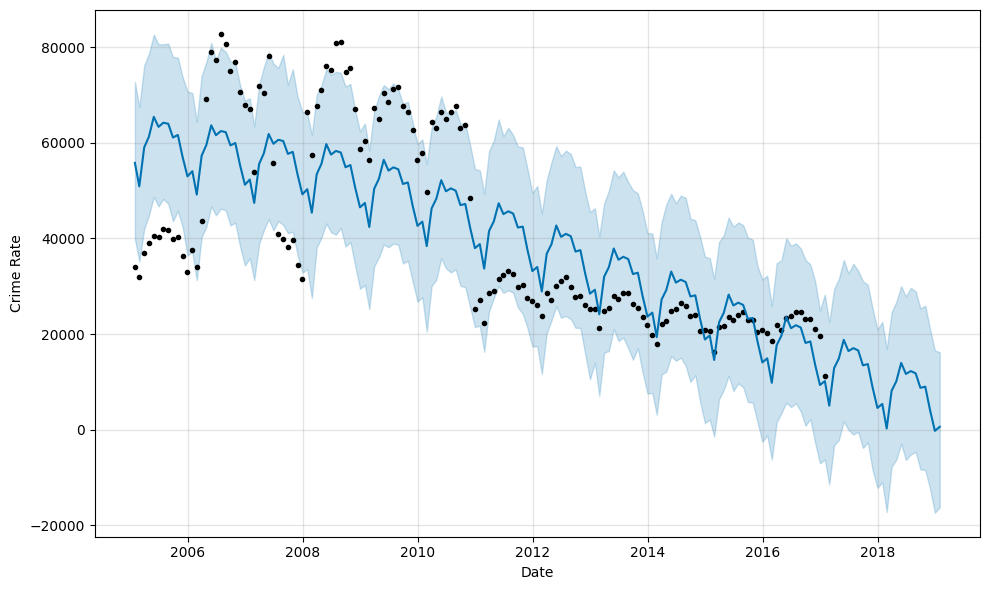

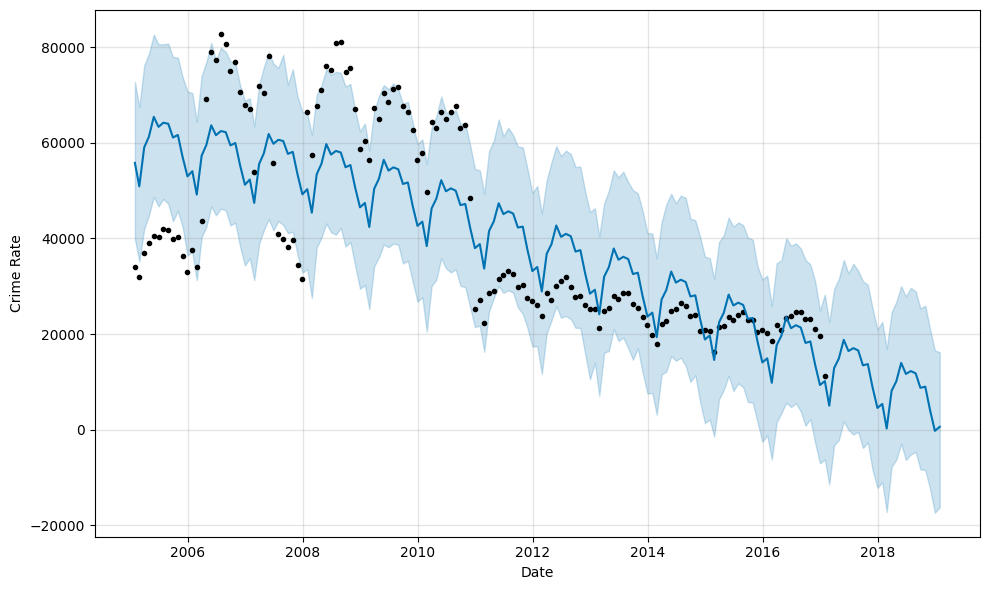

In [ ]:
m.plot(forcast,xlabel="Date",ylabel="Crime Rate")

**Save The Model**

In [ ]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

In [ ]:
with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(json.load(fin))  # Load model

In [ ]:
x = int(input("Enter Numbers Months to forecast"))


Enter Numbers Months to forecast24


In [ ]:
pred = m1.make_future_dataframe(periods=x ,freq = "M")
forcast = m1.predict(pred)

In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60511.268500,38321.559227,72603.820191,60511.268500,60511.268500,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,0.0,0.0,0.0,55795.820604
1,2005-02-28,60378.850602,34008.438061,66653.161856,60378.850602,60378.850602,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,0.0,0.0,0.0,50896.815851
2,2005-03-31,60232.245072,41511.243553,75953.114465,60232.245072,60232.245072,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,0.0,0.0,0.0,59023.237354
3,2005-04-30,60090.368753,45189.722788,78759.751606,60090.368753,60090.368753,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,0.0,0.0,0.0,61263.724711
4,2005-05-31,59943.763223,47593.009167,82218.172301,59943.763223,59943.763223,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,0.0,0.0,0.0,65420.651036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6961.825072,-7707.246504,26822.950957,6613.114072,7298.155074,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,0.0,0.0,0.0,8775.847754
165,2018-10-31,6556.652876,-7906.232147,25523.848109,6177.119873,6925.058515,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,0.0,0.0,0.0,9015.133948
166,2018-11-30,6164.550750,-11803.822321,20458.551941,5759.015708,6553.798783,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,0.0,0.0,0.0,4150.417501
167,2018-12-31,5759.378554,-16420.214264,16673.056789,5326.930560,6179.407261,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,0.0,0.0,0.0,-218.895283


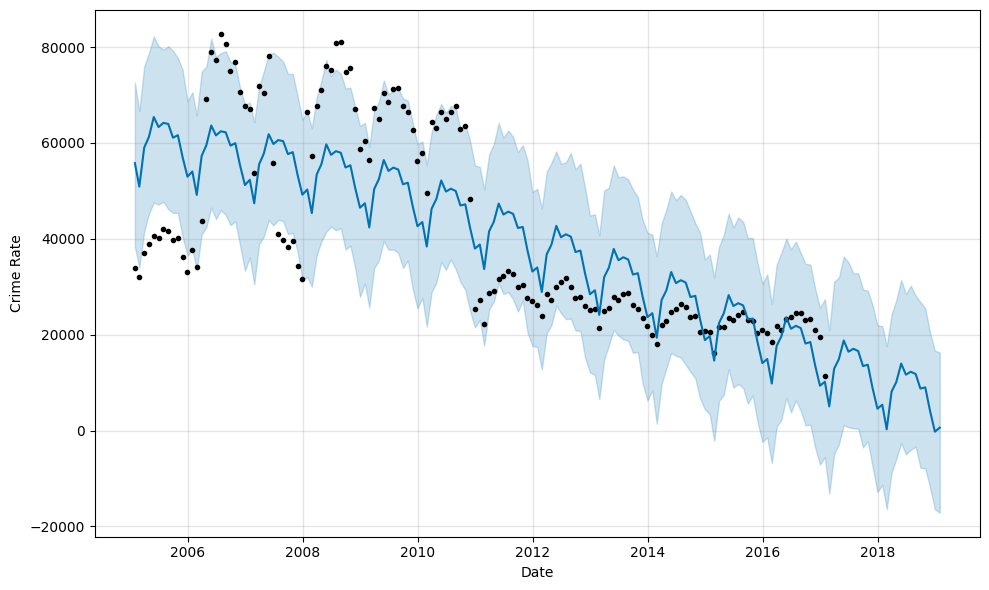

In [ ]:
figure = m1.plot(forcast, xlabel='Date', ylabel='Crime Rate')